<a href="https://colab.research.google.com/github/fikarrizkip/projects/blob/main/Bussiness_Decision_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DATA**

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
print('Lima data teratas:')
print(df.head())
print('Info dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  
Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      -----

# **DATA CLEANSING**

In [ ]:
#transformasi data kolom First Transaction dan Last Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

#menghapus kolom yang tidak diperlukan
del df['no']
del df['Row_Num']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 4.6+ MB


In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000128
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

# **DATA VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt

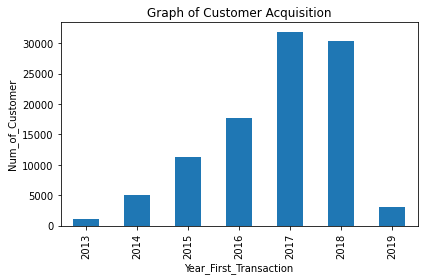

In [ ]:
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

**Visualisasikanlah trend jumlah transaksi per tahunnya dengan menggunakan bar chart.**

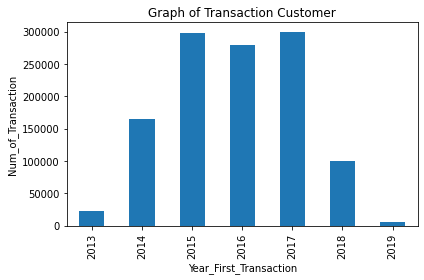

In [ ]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

**Dengan menggunakan seaborn pointplot, visualisasikanlah tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya.**

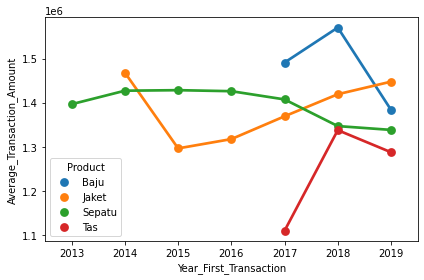

In [ ]:
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
              x='Year_First_Transaction',
              y='Average_Transaction_Amount',
              hue='Product')
plt.tight_layout()
plt.show()

**Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart.**

In [ ]:
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

<Figure size 432x288 with 0 Axes>

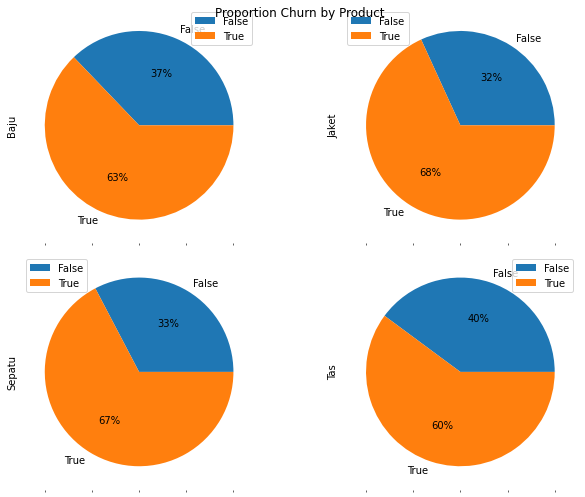

In [ ]:
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn',
                        columns='Product',
                        values='Customer_ID',
                        aggfunc='count',
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

**visualisasi dari distribusi kategorisasi count transaction**

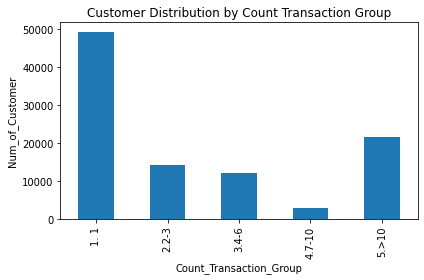

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2-3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
        val ='3.4-6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
        val ='4.7-10'
    else:
        val ='5.>10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

**visualisasi dari distribusi kategorisasi average transaction amount.**

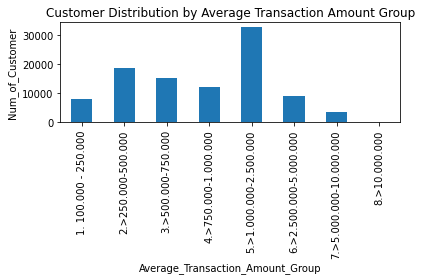

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <=500000):
        val ='2.>250.000-500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <=750000):
        val ='3.>500.000-750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <=1000000):
        val ='4.>750.000-1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <=2500000):
        val ='5.>1.000.000-2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <=5000000):
        val ='6.>2.500.000-5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <=10000000):
        val ='7.>5.000.000-10.000.000'
    else:
        val ='8.>10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns]

# Target variable
y = df['is_churn']

In [ ]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

X = df[feature_columns]
y = df['is_churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_Y = label_encoder.fit_transform(y_train)
test_Y = label_encoder.fit_transform(y_test)
logreg.fit(X_train, train_Y)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(test_Y, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


<Figure size 432x288 with 0 Axes>

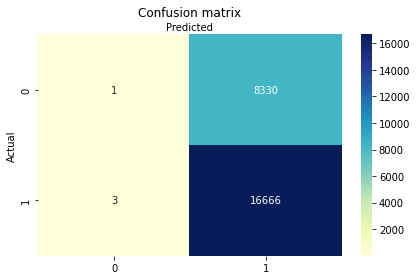

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(test_Y, y_pred))
print('Precision:', precision_score(test_Y, y_pred, average='micro'))
print('Recall   :', recall_score(test_Y, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668
